# Statistical Outlier Detection - IQR

We know that IQR is Q3 - Q1, and we can set the lower and upper bound by Q1 - 1.5IQR and Q3 + 1.5IQR. Boxplot automatically draws the lower/upper bound for us. We can also detect the data by defining a function.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/Nov2Temp.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   high    118 non-null    int64
 1   low     118 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [3]:
df.describe()

,high,low
count,118.000000,118.000000
mean,56.830508,29.262712
std,17.205796,12.877084
min,15.000000,-33.000000
25%,48.250000,24.000000
50%,57.500000,31.000000
75%,66.750000,36.750000
max,127.000000,54.000000


In [4]:
df.shape

(118, 2)

## Check for outliers in df['low']

<Axes: >

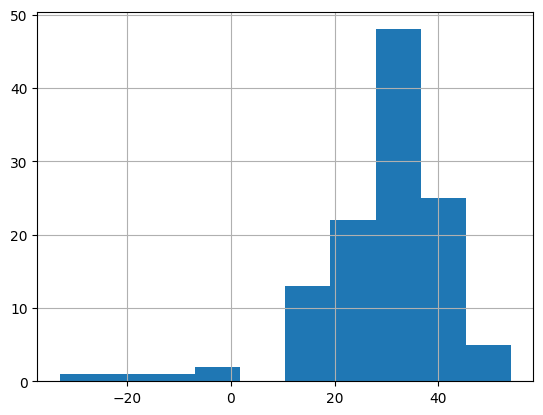

In [5]:
df['low'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff0f51fe640>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff0f51feb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff0f51fe4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff0f5212100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff0f52123a0>],
 'means': []}

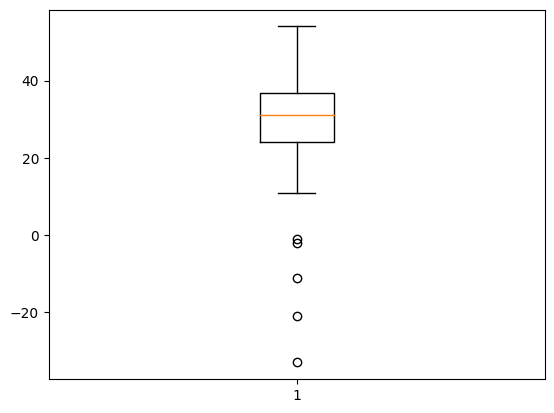

In [6]:
plt.boxplot(df['low'])

## Setup thresholds

In [7]:
low_IQR = df['low'].quantile(0.75) - df['low'].quantile(0.25)
low_low_limit = df['low'].quantile(0.25) - 1.5 * low_IQR

print(low_low_limit)

4.875


In [8]:
low_high_limit = df['low'].quantile(0.75) + 1.5 * low_IQR

print(low_high_limit)

55.875


In [9]:
df[df['low'] < low_low_limit] 

,high,low
41,41,-2
79,18,-1
109,48,-11
110,43,-21
111,64,-33


In [10]:
df[df['low'] > low_high_limit] 

,high,low


## Remove outliers

In [11]:
df.drop(df[df['low'] < low_low_limit].index, inplace = True)

In [12]:
df.drop(df[df['low'] > low_high_limit].index, inplace = True)

## Check Results

<Axes: >

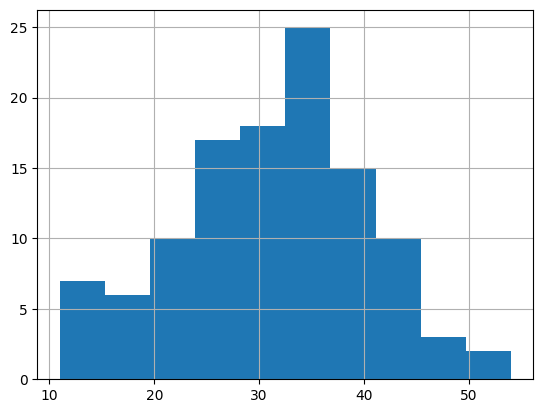

In [13]:
df['low'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff0f5106c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff0f51161c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff0f51069a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff0f5116700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff0f51169a0>],
 'means': []}

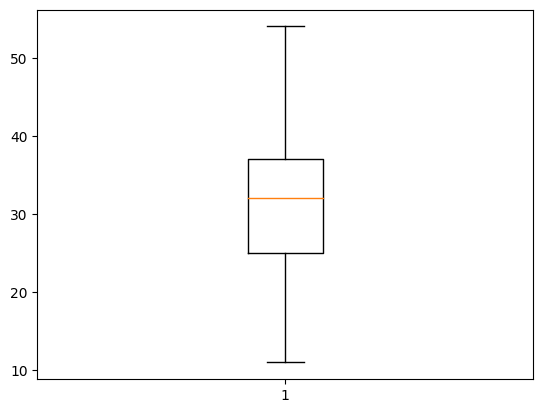

In [14]:
plt.boxplot(df['low'])

## Practice

Let's do the same thing for df['high']